# Prerequisite

In [2]:
suppressPackageStartupMessages({
    library(ArchR)
    library(rhdf5)
    library(parallel)
    library(dplyr)
    library("BSgenome.Hsapiens.UCSC.hg38")
    })


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [3]:
addArchRGenome("hg38")
addArchRThreads(threads = 16)

Setting default genome to Hg38.

Setting default number of Parallel threads to 16.



In [4]:
data_name <- 'PBMC_multiomics/'
input_dir <- '/home/siluo/public/SiyuanLuo/projects/benchmark/raw_data/'
output_dir <- '/home/siluo/public/SiyuanLuo/projects/benchmark/cleaned_data/'

In [5]:
inputFiles <- paste0(input_dir, data_name, "pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz")
names(inputFiles) <- c("PBMC_multi-omics_10X")

# Load raw data

In [6]:
# create arrow file
ArrowFiles <- createArrowFiles(
  inputFiles = inputFiles,
  sampleNames = names(inputFiles),
  minTSS = 0, 
  minFrags = 0, 
  addTileMat = FALSE,
  addGeneScoreMat = FALSE,
  force = TRUE
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

ArchR logging to : ArchRLogs/ArchR-createArrows-1cbf8527e3dd9-Date-2023-02-21_Time-18-46-46.log
If there is an issue, please report to github with logFile!

Cleaning Temporary Files

subThreadhing Disabled since ArchRLocking is TRUE see `addArchRLocking`

2023-02-21 18:46:47 : Batch Execution w/ safelapply!, 0 mins elapsed.

(PBMC_multi-omics_10X : 1 of 1) Checking if completed file exists!

2023-02-21 18:46:47 : (PBMC_multi-omics_10X : 1 of 1) Arrow Exists! Overriding since not completed!, 0.002 mins elapsed.

(PBMC_multi-omics_10X : 1 of 1) Determining Arrow Method to use!

2023-02-21 18:46:48 : (PBMC_multi-omics_10X : 1 of 1) Reading In Fragments from inputFiles (readMethod = tabix), 0.003 mins elapsed.

2023-02-21 18:46:48 : (PBMC_multi-omics_10X : 1 of 1) Tabix Bed To Temporary File, 0.003 mins elapsed.

Warning message in sprintf("%s Reading TabixFile %s Percent", prefix, round(1

In [8]:
# create archR project
projPBMC10X <- ArchRProject(
  ArrowFiles = ArrowFiles, 
  outputDirectory = "projPBMC10X",
  copyArrows = FALSE, #This is recommended so that if you modify the Arrow files you have an original copy for later usage.
  showLogo = FALSE
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...

1 


Getting Cell Metadata...

1 


Merging Cell Metadata...

Initializing ArchRProject...



In [9]:
# add Tile matrix
addTileMatrix(
  input = projPBMC10X,
  chromSizes = if (inherits(projPBMC10X, "ArchRProject")) getChromSizes(projPBMC10X) else NULL,
  blacklist = if (inherits(projPBMC10X, "ArchRProject")) getBlacklist(projPBMC10X) else NULL,
  tileSize = 500,
  binarize = TRUE,
  excludeChr = c("chrM", "chrY"),
  threads = getArchRThreads(),
  parallelParam = NULL,
  force = TRUE,
  logFile = createLogFile("addTileMatrix")
)

ArchR logging to : ArchRLogs/ArchR-addTileMatrix-1cbf8197ce605-Date-2023-02-21_Time-19-13-35.log
If there is an issue, please report to github with logFile!

2023-02-21 19:13:37 : Batch Execution w/ safelapply!, 0 mins elapsed.

2023-02-21 19:13:47 : Adding TileMatrix to PBMC_multi-omics_10X for Chr (1 of 23)!, 0.165 mins elapsed.

2023-02-21 19:14:15 : Adding TileMatrix to PBMC_multi-omics_10X for Chr (2 of 23)!, 0.643 mins elapsed.

2023-02-21 19:14:35 : Adding TileMatrix to PBMC_multi-omics_10X for Chr (3 of 23)!, 0.971 mins elapsed.

2023-02-21 19:14:50 : Adding TileMatrix to PBMC_multi-omics_10X for Chr (4 of 23)!, 1.224 mins elapsed.

2023-02-21 19:15:01 : Adding TileMatrix to PBMC_multi-omics_10X for Chr (5 of 23)!, 1.407 mins elapsed.

2023-02-21 19:15:14 : Adding TileMatrix to PBMC_multi-omics_10X for Chr (6 of 23)!, 1.625 mins elapsed.

2023-02-21 19:15:30 : Adding TileMatrix to PBMC_multi-omics_10X for Chr (7 of 23)!, 1.882 mins elapsed.

2023-02-21 19:15:43 : Adding TileMat

class: ArchRProject 
outputDirectory: /home/siluo/public/SiyuanLuo/projects/benchmark/scripts/data_cleaning/PBMC_multiomics/projPBMC10X 
samples(1): PBMC_multi-omics_10X
sampleColData names(1): ArrowFiles
cellColData names(13): Sample TSSEnrichment ... nDiFrags BlacklistRatio
numberOfCells(1): 639351
medianTSS(1): 0.099
medianFrags(1): 5

In [10]:
# check how much memory is used to store the ArchRProject in memory within R:
paste0("Memory Size = ", round(object.size(projPBMC10X) / 10^6, 3), " MB")
# check available matrix
getAvailableMatrices(projPBMC10X)

[1] "Memory Size = 185.918 MB"

[1] "TileMatrix"

# Per cell QC

**Check the QC plots to decide the threshold:**

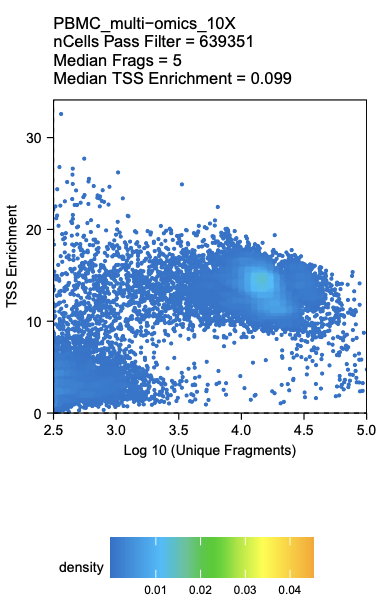

In [23]:
th_tss <- 2
th_nfrag <- 1000
idxPass1 <- projPBMC10X$TSSEnrichment >= th_tss
idxPass2 <- projPBMC10X$nFrags >= th_nfrag
table(data.frame(list("tss"=idxPass1, "nfrags"=idxPass2)))

       nfrags
tss      FALSE   TRUE
  FALSE 599902     86
  TRUE   27540  11823

In [24]:
th_tss <- 8
th_nfrag <- 1000
idxPass1 <- projPBMC10X$TSSEnrichment >= th_tss
idxPass2 <- projPBMC10X$nFrags >= th_nfrag
table(data.frame(list("tss"=idxPass1, "nfrags"=idxPass2)))

       nfrags
tss      FALSE   TRUE
  FALSE 626589    533
  TRUE     853  11376

In [25]:
th_tss <- 8
th_nfrag <- 1000

In [26]:
# Subsetting by per cell QC
idxPass1 <- projPBMC10X$TSSEnrichment >= th_tss
idxPass2 <- projPBMC10X$nFrags >= th_nfrag

cellsPass <- projPBMC10X$cellNames[idxPass1 & idxPass2]
saveArchRProject(ArchRProj = projPBMC10X, load = FALSE) 
# projPBMC10X <-loadArchRProject(path = "projPBMC10X", force = FALSE, showLogo = TRUE)

df_QC <- data.frame(sub('PBMC_multi-omics_10X#', '', rownames(getCellColData(projPBMC10X))))
colnames(df_QC) <- c("cell_id")
rownames(df_QC) <- df_QC$cell_id
df_QC["QC"] <- "filtered_out"

projPBMC10X2 <- projPBMC10X[cellsPass, ]

df_QC[rownames(df_QC) %in% sub('PBMC_multi-omics_10X#', '', rownames(getCellColData(projPBMC10X2))),"QC"] <- "doublet"


Copying Arrow Files...

Copying Arrow Files (1 of 1)

Saving ArchRProject...



In [27]:
# identify doublets
projPBMC10X2 <- addDoubletScores(
  input = projPBMC10X2,
  k = 30, #Refers to how many cells near a "pseudo-doublet" to count.
  knnMethod = "UMAP", #Refers to the embedding to use for nearest neighbor search with doublet projection.
  LSIMethod = 1 # "tf-logidf"
)

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-1cbf845e14eac-Date-2023-02-21_Time-20-03-35.log
If there is an issue, please report to github with logFile!

2023-02-21 20:03:36 : Batch Execution w/ safelapply!, 0 mins elapsed.

2023-02-21 20:03:36 : PBMC_multi-omics_10X (1 of 1) :  Computing Doublet Statistics, 0.001 mins elapsed.

Biased Clusters : 
Cluster12 
Cluster15 


PBMC_multi-omics_10X (1 of 1) : UMAP Projection R^2 = 0.99714

PBMC_multi-omics_10X (1 of 1) : UMAP Projection R^2 = 0.99714

ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-1cbf845e14eac-Date-2023-02-21_Time-20-03-35.log



In [28]:
# remove doublets
projPBMC10X2 <- filterDoublets(projPBMC10X2)

Filtering 1294 cells from ArchRProject!

	PBMC_multi-omics_10X : 1294 of 11376 (11.4%)



ERROR: Error in saveArchRProject(ArchRProj = projPBMC10X2, outputDirectory = "projPBMC10X2", : unused argument (showLogo = FALSE)


In [29]:
# save the project
projPBMC10X2 <- saveArchRProject(ArchRProj = projPBMC10X2, 
                                 outputDirectory = "projPBMC10X2",
                                 load=TRUE) # load=TRUE when one want to overwrite the original files


Copying ArchRProject to new outputDirectory : /home/siluo/public/SiyuanLuo/projects/benchmark/scripts/data_cleaning/PBMC_multiomics/projPBMC10X2

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 1): PBMC_multi-omics_10X

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     

In [30]:
# plot QC metrics
df <- getCellColData(projPBMC10X2, select = c("log10(nFrags)", "TSSEnrichment"))
p1 <- ggPoint(
  x = df[,1], 
  y = df[,2], 
  colorDensity = TRUE,
  continuousSet = "sambaNight",
  xlabel = "Log10 Unique Fragments",
  ylabel = "TSS Enrichment",
  xlim = c(log10(500), quantile(df[,1], probs = 0.99)),
  ylim = c(0, quantile(df[,2], probs = 0.99))
) + geom_hline(yintercept = th_tss, lty = "dashed") + geom_vline(xintercept = log10(th_nfrag), lty = "dashed")


p2 <- plotGroups(
  ArchRProj = projPBMC10X2, 
  groupBy = "Sample", 
  colorBy = "cellColData", 
  name = "TSSEnrichment",
  plotAs = "violin",
  alpha = 0.4,
  addBoxPlot = TRUE
)
p3 <- plotGroups(
  ArchRProj = projPBMC10X2, 
  groupBy = "Sample", 
  colorBy = "cellColData", 
  name = "log10(nFrags)",
  plotAs = "violin",
  alpha = 0.4,
  addBoxPlot = TRUE
)
p4 <- plotFragmentSizes(ArchRProj = projPBMC10X2)
p5 <- plotTSSEnrichment(ArchRProj = projPBMC10X2)

1 


1 


ArchR logging to : ArchRLogs/ArchR-plotFragmentSizes-1cbf8535e020a-Date-2023-02-21_Time-20-37-12.log
If there is an issue, please report to github with logFile!

2023-02-21 20:37:12 : PBMC_multi-omics_10X Computing FragmentSizes (1 of 1)!, 0.01 mins elapsed.

2023-02-21 20:38:44 : PBMC_multi-omics_10X Finished Computing FragmentSizes (1 of 1)!, 1.534 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotFragmentSizes-1cbf8535e020a-Date-2023-02-21_Time-20-37-12.log

ArchR logging to : ArchRLogs/ArchR-plotTSSEnrichment-1cbf8526374f2-Date-2023-02-21_Time-20-38-44.log
If there is an issue, please report to github with logFile!

subThreadhing Disabled since ArchRLocking is TRUE see `addArchRLocking`

2023-02-21 20:38:47 : PBMC_multi-omics_10X Computing TSS (1 of 1)!, 0.049 mins elapsed.

2023-02-21 20:41:29 : PBMC_multi-omics_10X Finished Computing TSS (1 of 1)!, 2.753 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotTSSEnrichment-1cbf8526374f2-Date-2023

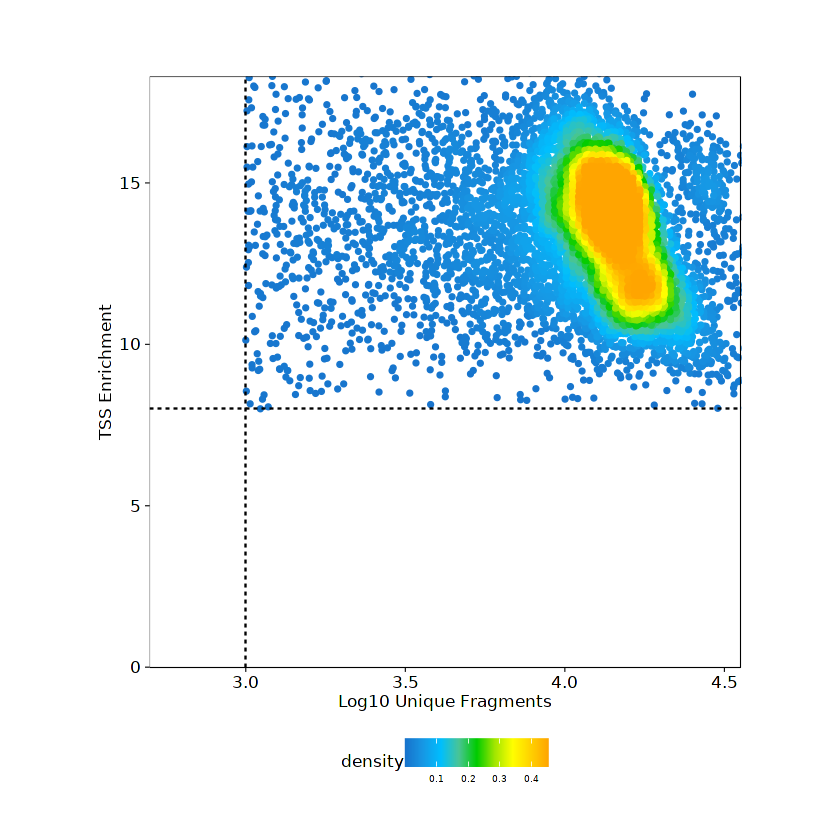

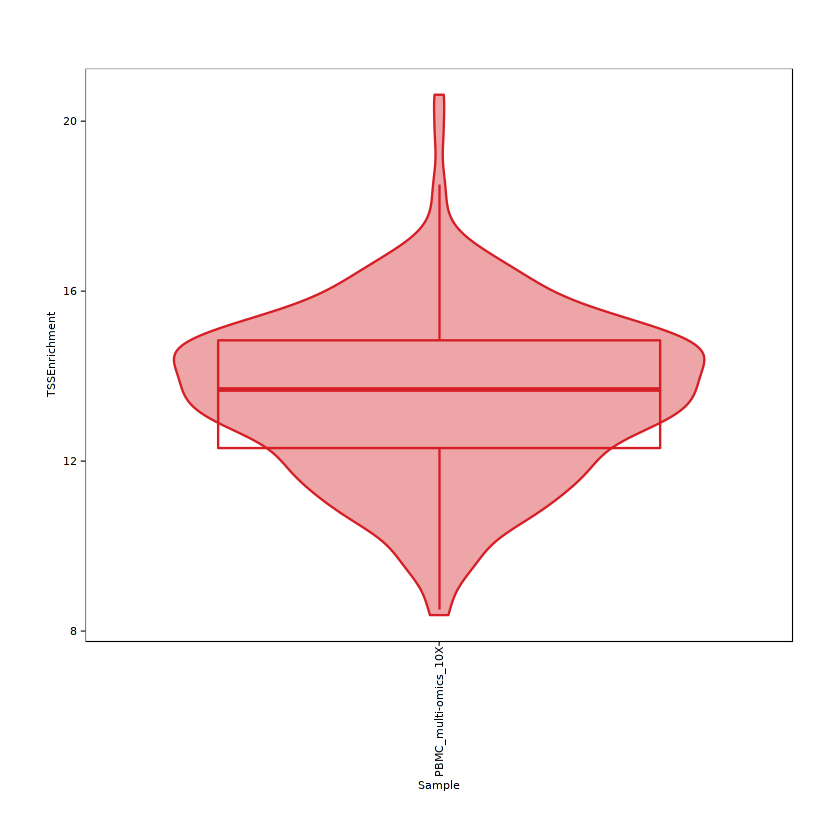

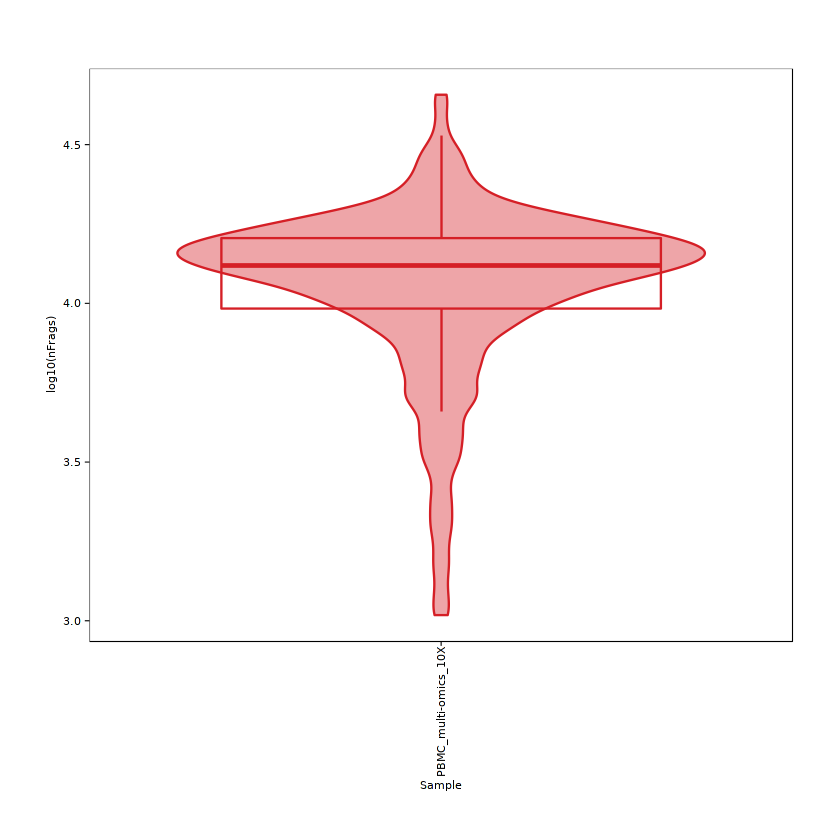

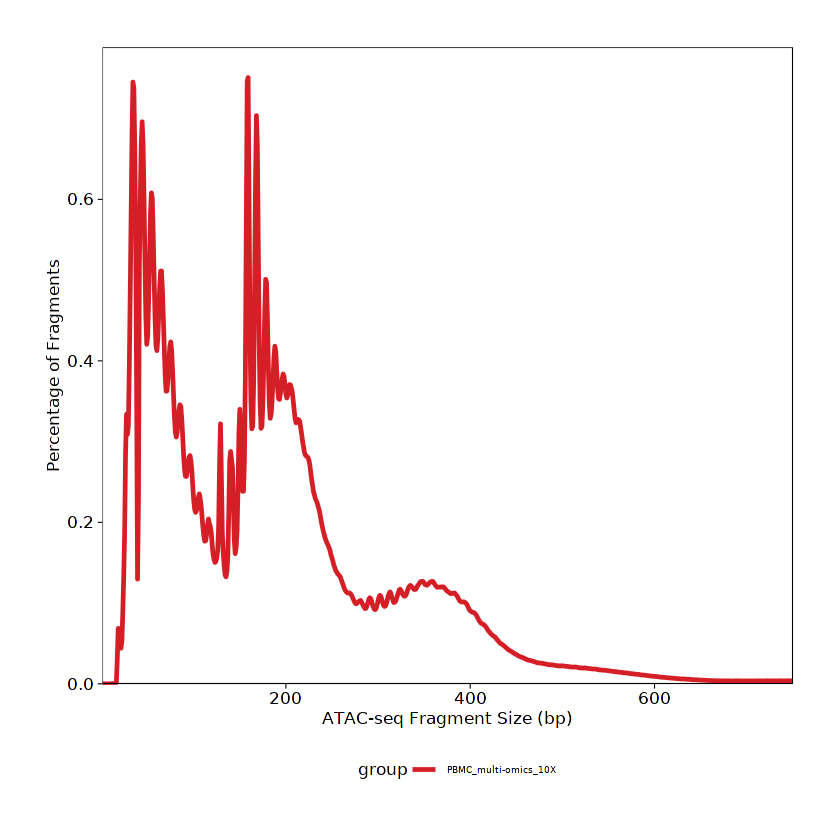

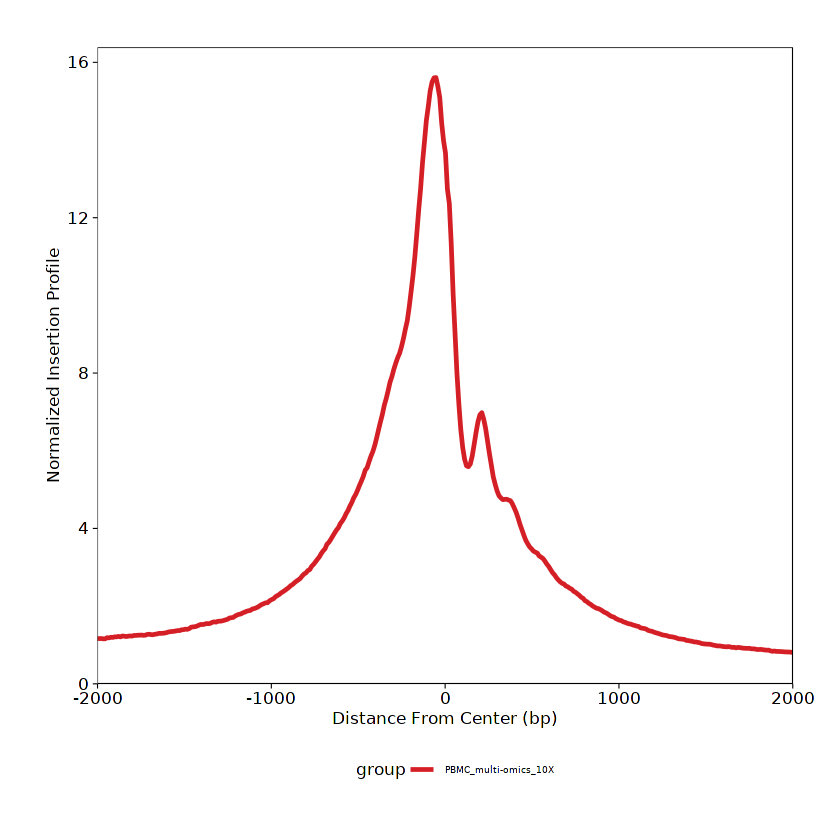

In [31]:
p1
p2
p3
p4
p5

In [32]:
# plot to a pdf file
plotPDF(p1,p2,p3,p4,p5, name = "Plot-QC.pdf", ArchRProj = projPBMC10X2, addDOC = FALSE, width = 5, height = 5)


Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



In [33]:
# Output passed cell id
df_QC[rownames(df_QC) %in% sub('PBMC_multi-omics_10X#', '', rownames(getCellColData(projPBMC10X2))),"QC"] <- "passed"
df_keep <- df_QC[df_QC$QC == "passed",]
dim(df_keep)

[1] 10082     2

In [34]:
write.table(df_keep, file='Cell_id_keep_ArchR.txt', sep='\t', quote = FALSE, row.names=FALSE)

In [35]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8           LC_NUMERIC=C              
 [3] LC_TIME=de_CH.UTF-8        LC_COLLATE=C.UTF-8        
 [5] LC_MONETARY=de_CH.UTF-8    LC_MESSAGES=C.UTF-8       
 [7] LC_PAPER=de_CH.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_CH.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] nabor_0.5.0                       sp_1.6-0                         
 [3] SeuratObject_4.1.1                Seurat_4.1.1           

In [1]:
# get the RNA annotation of selected cells
df_rna <- read.table("/home/siluo/public/SiyuanLuo/projects/sc_chromatin_benchmark/PBMC_multi-omics_10X/rna/PBMC_multiomics_10X_predicted_cell_type_from_RNA_curated_leiden_PCA11.txt",
                    header=TRUE, sep='\t',row.names=1)

In [3]:
length(unique(df_rna$final_label))

[1] 15

In [19]:
head(df_rna)

,final_label,atac_barcode
,<chr>,<chr>
AAACAGCCAATCCCTT-1,CD4 TCM,ACAGCGGGTAACGTGA-1
AAACAGCCAATGCGCT-1,CD4 Naive_1,ACAGCGGGTTTCACCC-1
AAACAGCCACCAACCG-1,CD8 Naive_2,ACAGCGGGTACTGGCC-1
AAACAGCCAGGATAAC-1,CD4 Naive_1,ACAGCGGGTGAGGAAG-1
AAACAGCCAGTAGGTG-1,CD8 Naive_1,ACAGCGGGTACCTTAA-1
AAACAGCCAGTTTACG-1,CD4 TCM,ACAGCGGGTAGACTAG-1


In [20]:
df_rna$rna_barcode <- rownames(df_rna)
dim(df_rna)

[1] 9379    3

In [21]:
df_atac <- read.table("Cell_id_keep_ArchR.txt",header=TRUE, sep='\t')
colnames(df_atac)<- c("rna_barcode","QC")
head(df_atac)
dim(df_atac)

,rna_barcode,QC
,<chr>,<chr>
1,GGTTGCGGTAAACAAG-1,passed
2,TGTTCCTCATAAGTTC-1,passed
3,ACGAACAAGACACTTA-1,passed
4,ACTAGGCGTTAGACCA-1,passed
5,TTAGCAATCGTTCACC-1,passed
6,AGTAAGTAGTTAGGCT-1,passed


[1] 10082     2

In [22]:
sum(df_rna$rna_barcode %in% df_atac$rna_barcode)

[1] 8560

In [23]:
df <- merge(df_rna, df_atac, by="rna_barcode")
head(df)
dim(df)

,rna_barcode,final_label,atac_barcode,QC
,<chr>,<chr>,<chr>,<chr>
1,AAACAGCCAATCCCTT-1,CD4 TCM,ACAGCGGGTAACGTGA-1,passed
2,AAACAGCCAATGCGCT-1,CD4 Naive_1,ACAGCGGGTTTCACCC-1,passed
3,AAACAGCCACCAACCG-1,CD8 Naive_2,ACAGCGGGTACTGGCC-1,passed
4,AAACAGCCAGGATAAC-1,CD4 Naive_1,ACAGCGGGTGAGGAAG-1,passed
5,AAACAGCCAGTTTACG-1,CD4 TCM,ACAGCGGGTAGACTAG-1,passed
6,AAACAGCCATCCAGGT-1,CD16 Mono,ACAGCGGGTGCCTTTC-1,passed


[1] 8560    4

In [24]:
write.table(df[,c("rna_barcode","final_label")], file='PBMC_multiomics_RNA_annotation.txt', sep='\t', quote = FALSE, row.names=FALSE)

In [27]:
write.table(df[,c("rna_barcode")], file='PBMC_multiomics_Cells.txt', sep='\t', quote = FALSE, row.names=FALSE, col.names = FALSE)

In [26]:
getwd()

[1] "/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/data_cleaning/PBMC_multiomics"